# Developing a customer satisfaction Model.

## The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values, Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

### Import the libraries and load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Airline_Dataset.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Run Explanatory Data Analysis (EDA) and Visualisation

In [4]:
df.info

<bound method DataFrame.info of         satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265       

In [5]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### This EDA shows that there are null values in the column "Arrival Delay in MInutes"

In [5]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

### Let us drop the rows containing null values because there are few such rows compared to total number of entries.



In [6]:
df_c=df.copy()
df.dropna(inplace=True)

## Let us check the satisfaction, gender, customer type, type of travel, class for the Airline Customers

In [7]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(df[c].value_counts()))
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



In [8]:
import gc
gc.collect()

40

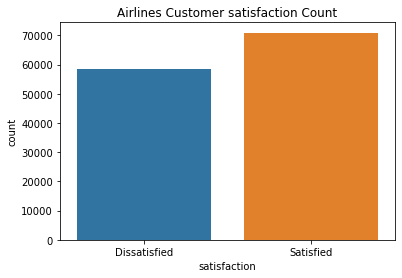

In [9]:
sns.countplot(x="satisfaction", data=df)
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

### The countplot shows more customers are satisfied meaning the customer satisfaction is higher. Our dataset is balanced since the satisfied and dissatidfied customers are almost equal.

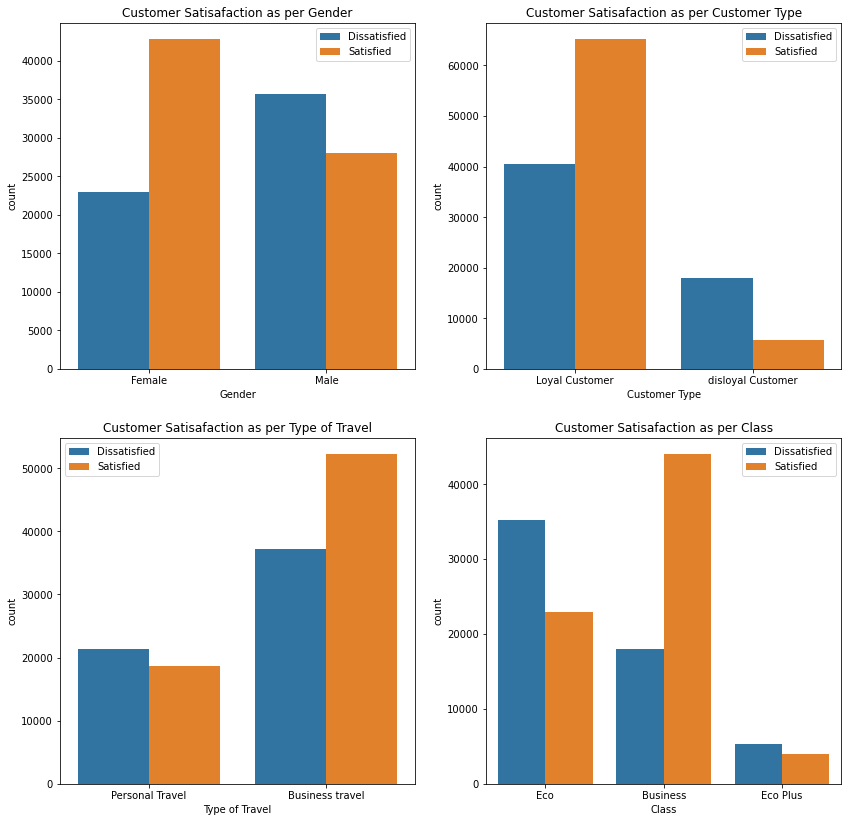

In [10]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

## This shows that female customers are more satisfied than male customers. Loyal customers are more satisfied than disloyal customers. People who travel for Business purposes are more satisfied than those on personal travel. More number of people in business class are more satisfied than those travelling in economy or eco plus class.

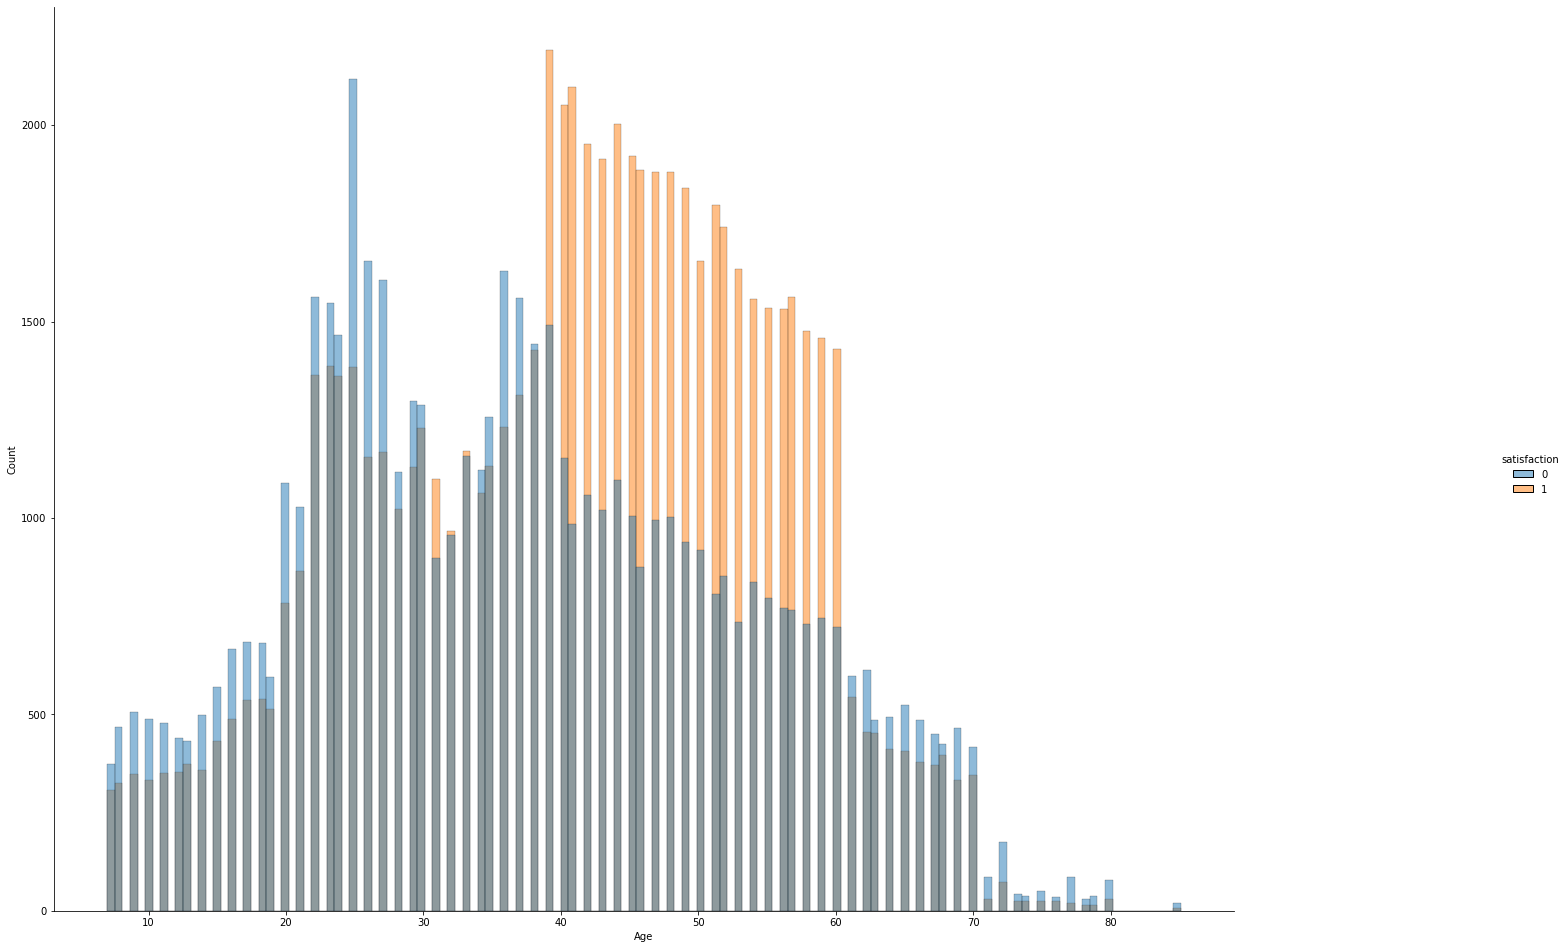

In [11]:
fg=sns.displot(df,x='Age',binwidth=0.55,hue='satisfaction')
fg.fig.set_figwidth(24.27)
fg.fig.set_figheight(14.7)
plt.show()

### This shows that Customers of age group between 38 to 60 are more satisfied than customers of other age group.

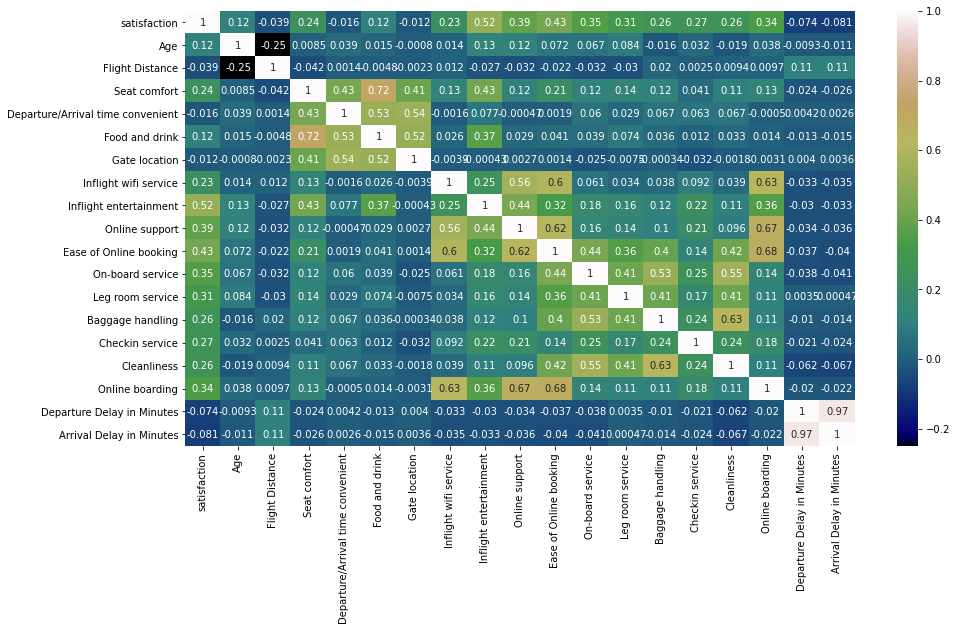

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()

### The factors like Flight Distance, Departure/Arrival time convenient, Gate location, Departure Delay in Minutes and Arrival Delay in Minutes have very low impact on customer satisfaction. So, we are going to drop those columns to reduce model complexity.

In [13]:
df.drop(['Flight Distance','Departure/Arrival time convenient','Gate location',
         'Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

In [14]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,Female,Loyal Customer,65,Personal Travel,Eco,0,0,2,4,2,3,3,0,3,5,3,2
1,1,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,2,2,3,4,4,4,2,3,2
2,1,Female,Loyal Customer,15,Personal Travel,Eco,0,0,2,0,2,2,3,3,4,4,4,2
3,1,Female,Loyal Customer,60,Personal Travel,Eco,0,0,3,4,3,1,1,0,1,4,1,3
4,1,Female,Loyal Customer,70,Personal Travel,Eco,0,0,4,3,4,2,2,0,2,4,2,5


## Check the number of rows and colums as a tuple with shape.

In [15]:
df.shape

(129487, 18)

## Lets get the independent variables represented by X and the dependent variable by y

In [16]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X.shape

(129487, 17)

## Perform data Preprocessing

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,3,4])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=np.float)

In [18]:
X.shape

(129487, 22)

## Model Selection

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=0)

sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [20]:
#function to plot learning curve for any classifier
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(X_train_sc,y_train)
pred_log1=log_reg1.predict(X_test_sc)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[4815 1067]
 [1087 5980]]
Accuracy is 0.8336551085025871


In [23]:
log_reg3=LogisticRegression(max_iter=2500)
log_reg3.fit(X_train,y_train)
pred_log3=log_reg3.predict(X_test)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log3))
print('Accuracy is\n', accuracy_score(y_test,pred_log3))

Test Scores
Confusion Matrix is
 [[4815 1067]
 [1087 5980]]
Accuracy is
 0.8336551085025871


In [24]:
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train_minmax,y_train)
pred_log2=log_reg2.predict(X_test_minmax)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is', accuracy_score(y_test,pred_log2))

Confusion Matrix is
 [[5069  813]
 [1325 5742]]
Accuracy is 0.8348907251525214


## Scaled data using MinMax scaling performed better than other scaling methods and unscaled data.

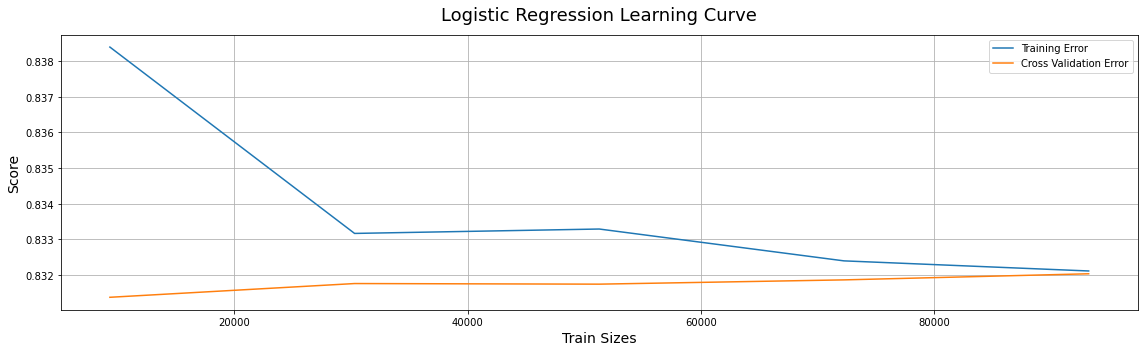

In [25]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_minmax, y_train, log_reg2,title)

### As train size increase, the training score and cross validation score are converging which means less deviation in accuracy.

# KNeighbours Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
for k in range(10,18):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
  knn.fit(X_train_sc,y_train)
  pred_knn = knn.predict(X_test_sc)

  print("k=",k)
  print('Confusion Matrix is ',confusion_matrix(y_test,pred_knn))
  print('Accuracy is', accuracy_score(y_test,pred_knn))
  print('\n')

k= 10
Confusion Matrix is  [[5582  300]
 [ 741 6326]]
Accuracy is 0.9196076917136459


k= 11
Confusion Matrix is  [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


k= 12
Confusion Matrix is  [[5571  311]
 [ 739 6328]]
Accuracy is 0.9189126573480577


k= 13
Confusion Matrix is  [[5517  365]
 [ 665 6402]]
Accuracy is 0.9204571781604757


k= 14
Confusion Matrix is  [[5564  318]
 [ 731 6336]]
Accuracy is 0.9189898833886787


k= 15
Confusion Matrix is  [[5508  374]
 [ 658 6409]]
Accuracy is 0.9203027260792339


k= 16
Confusion Matrix is  [[5553  329]
 [ 728 6339]]
Accuracy is 0.9183720750637114


k= 17
Confusion Matrix is  [[5511  371]
 [ 669 6398]]
Accuracy is 0.9196849177542668




### Knn algortihm performed best when value of k_neighjbours equals 11. So let's find the model's performance on both training and test sets. Performance was better with scaled data scaled using StandardScaler.

In [29]:
knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,y_train)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,knn_test))
print('Accuracy is', accuracy_score(y_test,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,knn_train))
print('Accuracy is', accuracy_score(y_train,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


For Train
Confusion Matrix is
  [[50106  2617]
 [ 4988 58827]]
Accuracy is 0.9347423158111517




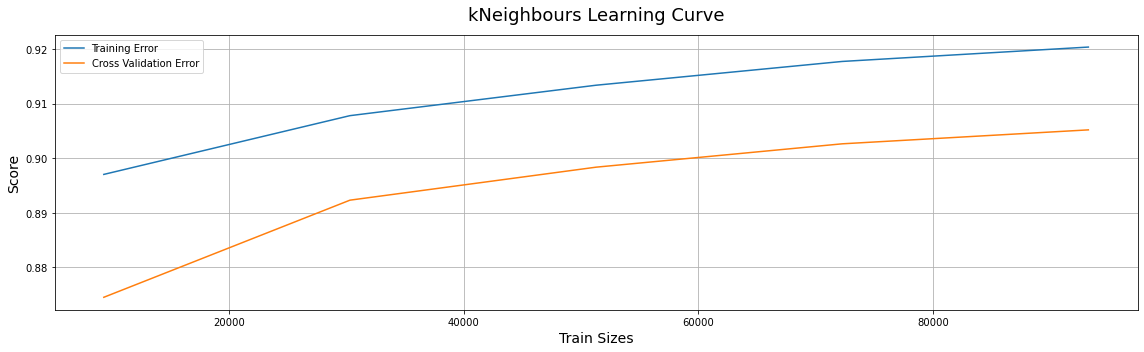

In [36]:
plt.figure(figsize = (16,5))
title = 'kNeighbours Learning Curve'
plotLearningCurves(X_train, y_train, knn,title)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(accuracy_score(y_test,pred_dtc))

d= 20
0.9471001621746853
d= 21
0.9474090663371689
d= 22
0.9474090663371689
d= 23
0.947331840296548
d= 24
0.9474862923777898
d= 25
0.9474862923777898
d= 26
0.9476407444590316
d= 27
0.9477951965402733
d= 28
0.947331840296548
d= 29
0.9477179704996525


### Decision Tree classifier performed best when max_depth is set to 25, max_leaf_nodes to 1000 and using entropy as criterion.

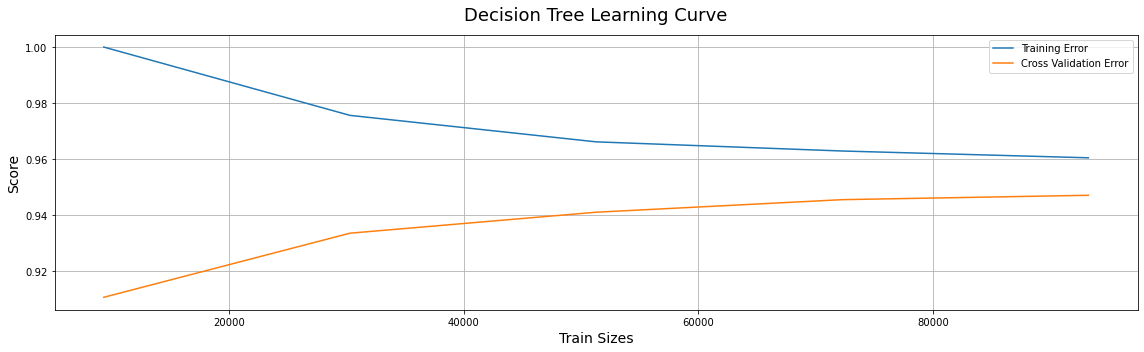

In [32]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)
#pred_dtc=dtc.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

### Cross validation score is increasing with increase in train size and also converging with training score. It means our model is learning well.

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

rfc.fit(X_train_sc, y_train)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))


Test Score: 0.9522743068962854
Train Score: 0.9820487737905232
Confusion Matrix for test set  
 [[5602  280]
 [ 338 6729]]


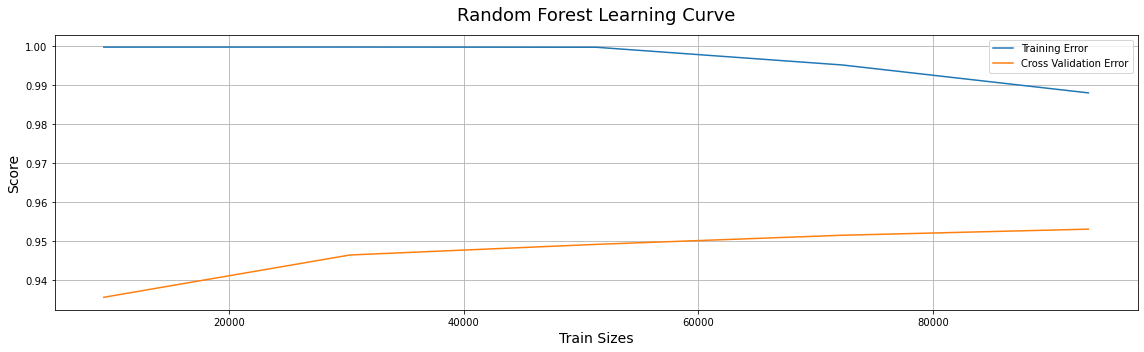

In [35]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train, y_train, rfc,title)

## Therefore in conclusion, In our problem to classify customer satisfaction, best accuracy was achieved using RandomForest Classifier. The best train score and test score achieved are 0.98 and 0.95 respectively.